In [53]:
# importing required libraries
import os
import zipfile
import pandas as pd
import warnings
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Unziping files

In [54]:
path_to_zip_file = '../data/raw/ml-100k.zip' # path to raw dataset
directory_to_extract_to = '../data/interim' # path, where unzipped version of dataset will be stored

# unzipping dataset
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [55]:
extracted_path = directory_to_extract_to + '/ml-100k' # path of extracted dataset

## Checking unzipped directory structure

In [56]:
for _, dirs, files in os.walk(extracted_path): # getting all directories and files inside this directory
    print('Files:') # display found files
    for file in files:
            print('\t', file)
    print()

    print('Directories') # display found directories
    for _dir in dirs:
        print('\t', _dir)

Files:
	 allbut.pl
	 mku.sh
	 README
	 u.data
	 u.genre
	 u.info
	 u.item
	 u.occupation
	 u.user
	 u1.base
	 u1.test
	 u2.base
	 u2.test
	 u3.base
	 u3.test
	 u4.base
	 u4.test
	 u5.base
	 u5.test
	 ua.base
	 ua.test
	 ub.base
	 ub.test

Directories


## Checking data quality

In this section we will just read dataset files, and check for missing values inside this files

According to README:

These are tab separated lists:
* u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
* u.item     -- Information about the items (movies).
* u.user     -- Demographic information about the users.

Additional files that are interesting for us
* u.info     -- The number of users, items, and ratings in the u data set.
* u.genre    -- A list of the genres.
* u.occupation -- A list of the occupations.


All other files are just splits of dataset or scripts for generation of these datasets. We will not consider these file during data quality check, since all data stored in the files listed earlier.

### Ratings

In [57]:
# displaying 'u.data' to check file's structure
ratings = pd.read_csv(extracted_path + '/u.data', delimiter='\t', names=['user id', 'item id', 'rating', 'timestamp'])
ratings

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


Let's get information about data inside this file

In [58]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [59]:
# checking that there is no missing data in this file
print(ratings.isnull().any())

user id      False
item id      False
rating       False
timestamp    False
dtype: bool


As we can see, there are no missing data in this file. Every column is fully filled.

### Genres

In [60]:
# displaying 'u.genre' file
genres = pd.read_csv(extracted_path + '/u.genre', delimiter='|', index_col=1, names=['Genres'])
genres

,Genres
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's
5,Comedy
6,Crime
7,Documentary
8,Drama
9,Fantasy


It is just a list of genres

### Occupation

In [61]:
# displaying 'u.occupation' file
occupation = pd.read_csv(extracted_path + '/u.occupation', delimiter='\t')
occupation

,administrator
0,artist
1,doctor
2,educator
3,engineer
4,entertainment
5,executive
6,healthcare
7,homemaker
8,lawyer
9,librarian


Similarly to 'u.genres', it is just a list of occupations

### Movies

In [62]:
# displaying 'u.occupation' file
genres_list = genres['Genres'].values.tolist() # converting genres dataframe to list, in order to use it in columns naming
movies = pd.read_csv(extracted_path + '/u.item', delimiter='|', names=['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL'] + genres_list, encoding='ISO-8859-1', index_col=0)
movies

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
# displaying info about data inside read dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 1 to 1682
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie title         1682 non-null   object 
 1   release date        1681 non-null   object 
 2   video release date  0 non-null      float64
 3   IMDb URL            1679 non-null   object 
 4   unknown             1682 non-null   int64  
 5   Action              1682 non-null   int64  
 6   Adventure           1682 non-null   int64  
 7   Animation           1682 non-null   int64  
 8   Children's          1682 non-null   int64  
 9   Comedy              1682 non-null   int64  
 10  Crime               1682 non-null   int64  
 11  Documentary         1682 non-null   int64  
 12  Drama               1682 non-null   int64  
 13  Fantasy             1682 non-null   int64  
 14  Film-Noir           1682 non-null   int64  
 15  Horror              1682 non-null   int64  
 16  Musical    

We can see that there is no 'video release date' data for each film.

In [64]:
# checking for missing data in each column
print(movies.isnull().any())

movie title           False
release date           True
video release date     True
IMDb URL               True
unknown               False
Action                False
Adventure             False
Animation             False
Children's            False
Comedy                False
Crime                 False
Documentary           False
Drama                 False
Fantasy               False
Film-Noir             False
Horror                False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Thriller              False
War                   False
Western               False
dtype: bool


Except 'video release date', there are some missing data in 'release data' and ' IMDb URL' column. Let's display films with these gaps.

In [65]:
# showing films with missing data without considering 'video release date' column
movies[movies.drop('video release date', axis=1).isnull().any(axis=1)]

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
267,unknown,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1358,The Deadly Cure (1996),16-Sep-1996,NaN,NaN,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1359,Boys in Venice (1996),24-Sep-1996,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Users

In [66]:
# reading and displaying 'u.user' file
users = pd.read_csv(extracted_path +'/u.user', delimiter='|', names=['user id', 'age', 'gender', 'occupation', 'zip code'], index_col=0)
users

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [67]:
# displaying information about data inside read dataframe ('users' dataframe)
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [68]:
# checking for missing elements in this dataframe
users.isnull().any()

age           False
gender        False
occupation    False
zip code      False
dtype: bool

There are no missing elements, each feature is fully represented

## Data analysis

In this section we will explore how data is distributed.

### Ratings analysis

#### Rating values distribution

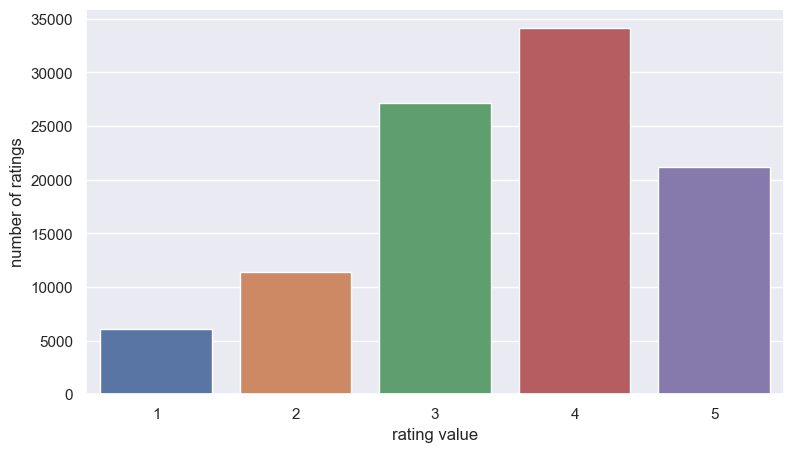

In [69]:
# plotting count plot for ratings
plot = sb.countplot(x=ratings['rating'].values.tolist())

# setting labels for plot
plot.set_xlabel('rating value')
plot.set_ylabel('number of ratings')

# saving figure
plt.savefig('../reports/figures/Ratings distribution.png')
# displaying figure
plt.show()

### Film's analysis

#### Release years distribution

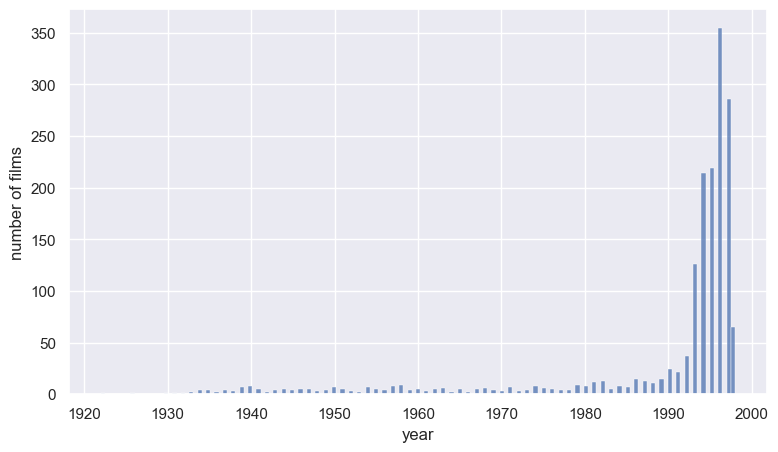

In [70]:
years = [] # list for film's release years

for date in movies['release date'].values: # for each release date
    if not pd.isna(date): # it is not none
        year = datetime.datetime.strptime(date, '%d-%b-%Y').year # convert string to date object, then get year from converted object
        years.append(year) # add obtained year value to the list

sb.set(rc={'figure.figsize':(9,5)}) # set figure size to (9, 5)
plot = sb.histplot(x=years) # plot histogram plot

# setting labels for plot
plot.set_xlabel('year')
plot.set_ylabel('number of films')

# saving figure
plt.savefig('../reports/figures/Movie release years distribution.png')
# displaying figure
plt.show()

#### Genres distribution

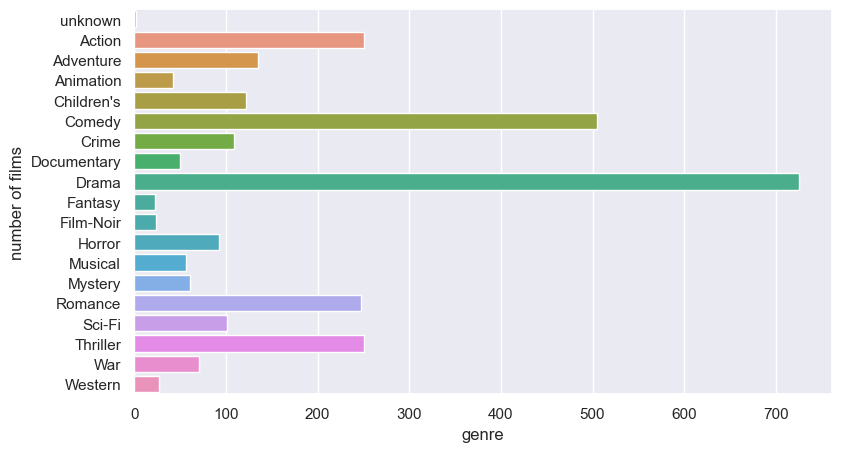

In [71]:
genres_count = {} # dictionary for counting occupations
for genre in genres_list: # for each genre
    genres_count[genre] = movies[genre].sum() # number of occurrences is just a sum of values for appropriate columns, since for films belonging to specific genre there is '1' inside this column and '0' for columns for genres that are not related to film

# plotting bar plot for obtained values
plot = sb.barplot(y=list(genres_count.keys()), x=list(genres_count.values()))

# setting labels for plot
plot.set_xlabel('genre')
plot.set_ylabel('number of films')

# saving figure
plt.savefig('../reports/figures/Movie genres distribution.png')
# displaying figure
plt.show()

### Users analysis

#### Ages distribution

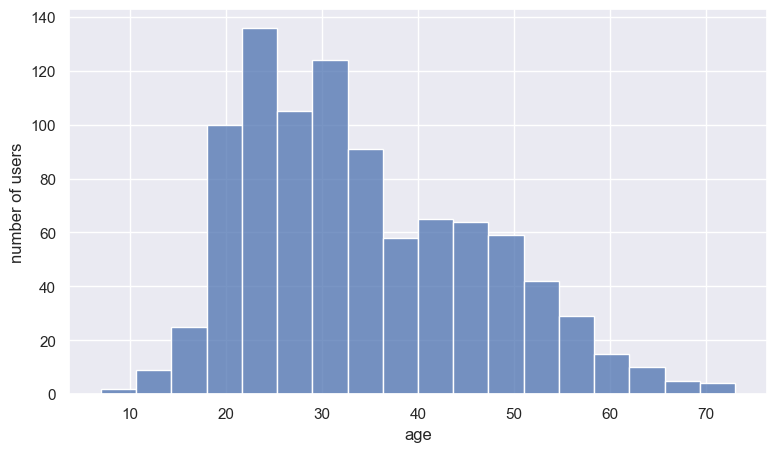

In [72]:
# plotting histogram plot for user age
plot = sb.histplot(x=users['age'])

# setting labels for plot
plot.set_ylabel('number of users')

# saving figure
plt.savefig('../reports/figures/User ages distribution.png')
# displaying figure
plt.show()

#### Genders distribution

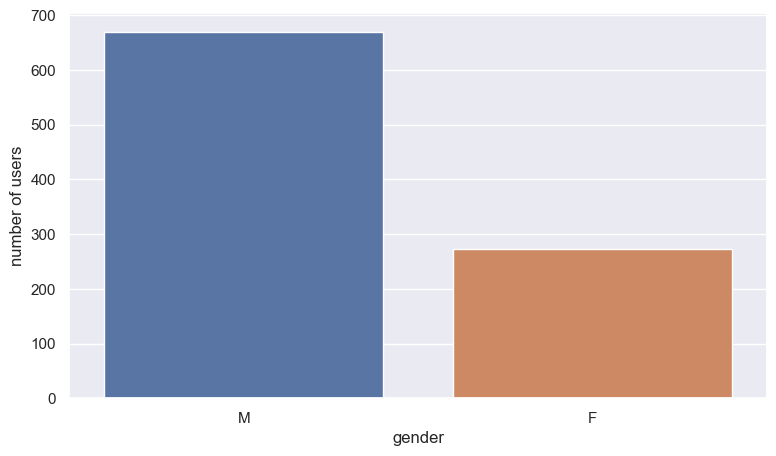

In [73]:
# plotting count plot for user gender
plot = sb.countplot(users, x='gender')

# setting labels for plot
plot.set_ylabel('number of users')

# saving figure
plt.savefig('../reports/figures/User genders distribution.png')
# displaying figure
plt.show()

#### Occupations distribution

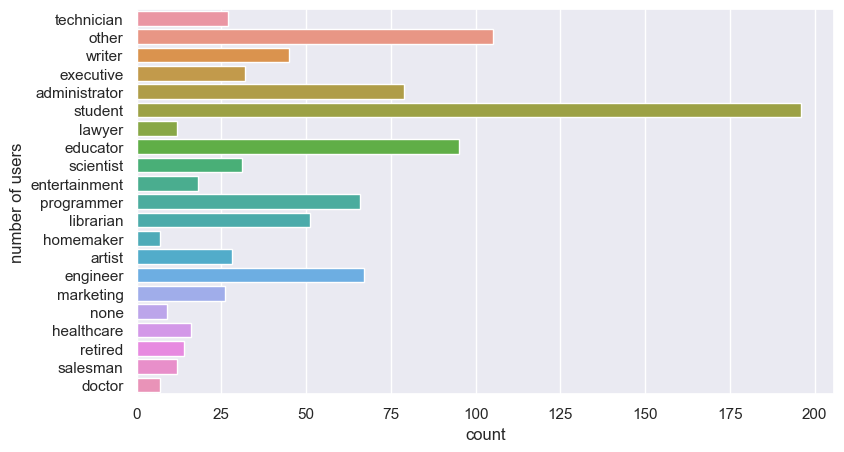

In [74]:
# plotting histogram plot for user occupation
plot = sb.countplot(users, y='occupation')

# setting labels for plot
plot.set_ylabel('number of users')

# saving figure
plt.savefig('../reports/figures/User occupations distribution.png')
# displaying figure
plt.show()

## Data preprocessing Ideas

Most of the preprocessing steps are model specific, and therefore they will be described in the [next notebook](./2_0_LightGCN_based_recommendation_system.ipynb). However, we still can list some basic steps:
* deletion of unused columns
* encoding of categorical features